In [1]:
import torch
import torch.nn as nn
import numpy as np
import torchvision.datasets as datasets
from torchvision import models
from torch.utils.data import DataLoader
import torchvision.transforms as T
import matplotlib.pyplot as plt

In [2]:
# Basic settings
root = 'Images'
num_classes = 3
batch_size = 64
num_epochs = 20
device = torch.device("mps")
#print_interval = 1

## Part B

In [3]:
transform = T.Compose([
    T.Resize([224,224]),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

dataset = datasets.ImageFolder(root=root,transform=transform)

train_dataset, test_dataset = torch.utils.data.random_split(dataset, [1168, 292])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [4]:
model = models.resnet18(weights='DEFAULT')
num_ftrs = model.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model.fc = nn.Linear(num_ftrs, num_classes)

model = model.to(device)

In [5]:
optimizer = torch.optim.Adam(
    model.parameters())

In [6]:
loss_func = nn.CrossEntropyLoss()

In [10]:
step = 0  # track how many training iterations we've been through
train_losses = []  # will be used to store loss values at each iteration
test_losses = []
train_accu = []
test_accu = []
 # sets model to training mode
for epoch in range(num_epochs):
    model.train() 
    for data, targets in train_loader:
        # Move data and targets to the same device as the model
        data = data.to(device)
        targets = targets.to(device)

        # Zero-out gradients - torch accumulates gradients by dfault,
        # so we have to manually reset them in each iteration
        optimizer.zero_grad()

        # Run forward pass - model returns the logits with shape (batch_size, num_classes)
        logits = model(data)

        # Compute loss
        loss = loss_func(logits, targets)

        # Perform backpropagation and update model parameters
        loss.backward()
        optimizer.step()

        # (Optional) store and print loss
    train_losses.append(loss.item())

    model.eval()
    conf_matrix = np.zeros((num_classes, num_classes), dtype=np.int32)
    with torch.no_grad():
        for data, targets in train_loader:
            # Make sure data is on the same device as the model
            data = data.to(device)
            targets = targets.to(device)

            # Run forward pass
            logits = model(data)

            # Get class predictions
            pred_classes = torch.argmax(logits, dim=1)

            # Update confusion matrix
            for target, pred in zip(targets, pred_classes):
                conf_matrix[target, pred] += 1
    acc = np.diag(conf_matrix).sum()/conf_matrix.sum()
    train_accu.append(acc*100)

    conf_matrix = np.zeros((num_classes, num_classes), dtype=np.int32)
    with torch.no_grad():
        for data, targets in test_loader:
            # Make sure data is on the same device as the model
            data = data.to(device)
            targets = targets.to(device)

            # Run forward pass
            logits = model(data)

            # Compute loss
            loss = loss_func(logits, targets)

            # Get class predictions
            pred_classes = torch.argmax(logits, dim=1)

            # Update confusion matrix
            for target, pred in zip(targets, pred_classes):
                conf_matrix[target, pred] += 1
    test_losses.append(loss.item())
    acc = np.diag(conf_matrix).sum()/conf_matrix.sum()
    test_accu.append(acc*100)

    step += 1

    print("Epoch",step)

Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20


### Loss

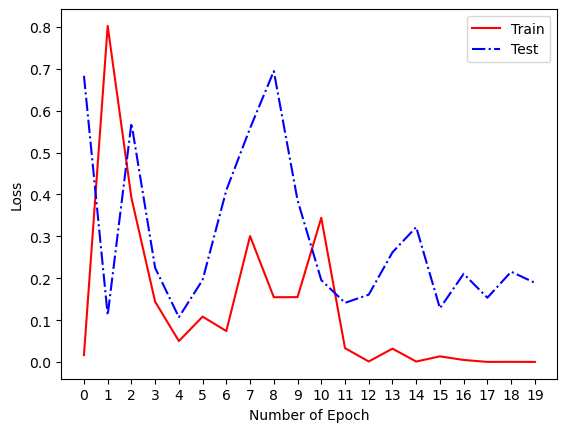

In [11]:
plt.figure()
plt.plot(train_losses, 'r-', label = 'Train')
plt.plot(test_losses, 'b-.', label = 'Test')
plt.xlabel('Number of Epoch')
plt.ylabel('Loss')
plt.xticks(range(20))
plt.legend()
plt.title("")
plt.show()

In [12]:
train_losses

[0.016741860657930374,
 0.8020749092102051,
 0.3920707106590271,
 0.14399820566177368,
 0.050181083381175995,
 0.10845915228128433,
 0.07408453524112701,
 0.3006386160850525,
 0.15474587678909302,
 0.15497185289859772,
 0.34427234530448914,
 0.033280421048402786,
 0.00146386562846601,
 0.03212109953165054,
 0.0013037967728450894,
 0.01369817741215229,
 0.005089083686470985,
 0.00044439220800995827,
 0.0006397853721864522,
 0.00041642208816483617]

In [13]:
test_losses

[0.6831237077713013,
 0.11212662607431412,
 0.5699355006217957,
 0.22482408583164215,
 0.10712490975856781,
 0.19601617753505707,
 0.4101852774620056,
 0.5580683946609497,
 0.694202184677124,
 0.3863018751144409,
 0.1957145780324936,
 0.14138640463352203,
 0.1608850508928299,
 0.2618865370750427,
 0.32206740975379944,
 0.1284293830394745,
 0.2105763703584671,
 0.15358956158161163,
 0.2155897170305252,
 0.18919646739959717]

### Accuracy

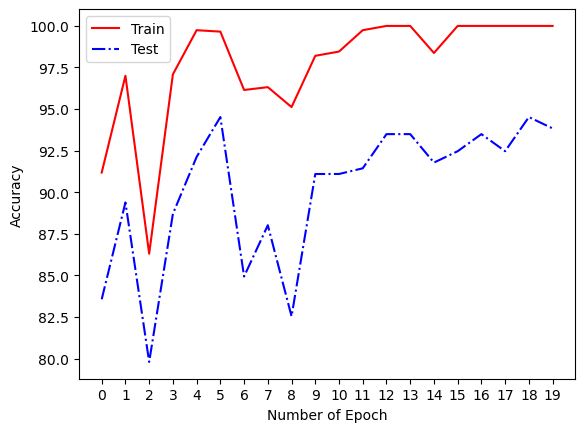

In [14]:
plt.figure()
plt.plot(train_accu, 'r-', label = 'Train')
plt.plot(test_accu, 'b-.', label = 'Test')
plt.xlabel('Number of Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(20))
plt.legend()
plt.show()

In [15]:
train_accu

[91.18150684931507,
 97.00342465753424,
 86.3013698630137,
 97.08904109589042,
 99.7431506849315,
 99.65753424657534,
 96.1472602739726,
 96.31849315068493,
 95.11986301369863,
 98.20205479452055,
 98.45890410958904,
 99.7431506849315,
 100.0,
 100.0,
 98.37328767123287,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0]

In [16]:
test_accu

[83.56164383561644,
 89.38356164383562,
 79.7945205479452,
 88.6986301369863,
 92.12328767123287,
 94.52054794520548,
 84.93150684931507,
 88.01369863013699,
 82.53424657534246,
 91.0958904109589,
 91.0958904109589,
 91.43835616438356,
 93.4931506849315,
 93.4931506849315,
 91.78082191780823,
 92.46575342465754,
 93.4931506849315,
 92.46575342465754,
 94.52054794520548,
 93.83561643835617]

In [ ]:
transform = T.Compose([
    T.Resize([224,224]),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_dataset2 = datasets.ImageFolder(root='../beverage cans/',transform=transform)

test_loader2 = DataLoader(test_dataset2, batch_size=batch_size, shuffle=False)

In [17]:
test_losses = []
test_accu = []

model.eval()

conf_matrix = np.zeros((num_classes, num_classes), dtype=np.int32)
with torch.no_grad():
    for data, targets in test_loader:
        # Make sure data is on the same device as the model
        data = data.to(device)
        targets = targets.to(device)

        # Run forward pass
        logits = model(data)

        # Get class predictions
        pred_classes = torch.argmax(logits, dim=1)

        # Update confusion matrix
        for target, pred in zip(targets, pred_classes):
            conf_matrix[target, pred] += 1
test_losses.append(loss.item())
acc = np.diag(conf_matrix).sum()/conf_matrix.sum()
test_accu.append(acc*100)

/Users/ayush/miniconda3/lib/python3.9/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
test_losses

[0.18919646739959717]

In [19]:
test_accu

[93.83561643835617]